# Evaluating Laplacian score for feature selection

[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/decarpentierg/laplacian-score-4-time-series/blob/main/doc/evaluate_laplacian_score.ipynb)

**Authors:** Gonzague De Carpentier, Jérémie Dentan

The goal of this notebook is to conduct some experiments to evaluate the Laplacian score for feature selection as introduced by [1] fo feature selection. Our experiments focus on **feature selection for classification of times series**.

**Some details about the comparison:**
- We use three time serie datasets: [2], [3], and [4]. Those datasets have various length (from TODO to TODO), number of sample (from TODO to TODO) and number of classes (TODO).
- We compare the laplacian score with two other feature selection techniques:
    - Feature selection using a threshold on the variance
    - Feature selection using the F-value of ANOVA [5] 
- For the comparison of the classification performances, we use scikit-learn SVC classifier with default parameters


**References:**
- [1] : *Laplacian Score for feature selection*, Xiaofei He,  Deng Cai, Partha Niyogi. 2005. In *Advances in Neural Information Processing Systems*.
- [2] : Jason Lines, A. Bagnall, https://timeseriesclassification.com/description.php?Dataset=SmallKitchenAppliances
- [3] : https://timeseriesclassification.com/description.php?Dataset=DiatomSizeReduction
- [4] : M. Guillame-Bert, https://timeseriesclassification.com/description.php?Dataset=PigAirwayPressure
- [5] : *The Analysis of Variance*, Henry scheffé. 1999. *John Wiley & Sons*

## Set up

You should run this notebook with `Python 3.9`. Moreover, this notebook is supposed to work with the code of repository [https://github.com/decarpentierg/laplacian-score-4-time-series](https://github.com/decarpentierg/laplacian-score-4-time-series), having the dependencies in `requirements.txt` installed and with your PYTHONPATH set to the root of the repository.

The following lines should do this for you. The first outputed line after the verbose should be a path to the root of the repository:
- If you are using this notebook directly from the repository, please set `CLONE_REPO=False` 
- If you are using this notebook as a standalone, please set `CLONE_REPO=True`

In [1]:
CLONE_REPO = False

In [2]:
from pathlib import Path
import os

REPO_NAME = 'laplacian-score-4-time-series'
REQUIREMENTS = 'requirements.txt'

# If all of this already have been done
if Path(os.getcwd()).name == REPO_NAME and Path('requirements.txt').exists():
    print('We are already at the root of the repo!')
    CLONE_REPO = False

# If we need to clone the repo but it's already here
if CLONE_REPO and Path(REPO_NAME).exists():
    print("The repository already exists!")
    CLONE_REPO = False
    os.chdir(REPO_NAME)
    assert Path(REQUIREMENTS).exists(), "There exists an incomplete version of the repository, please delete it and try again"

# If we need to clone the repo and it isn't here
os.environ['CLONE_REPO'] = str(CLONE_REPO)
!if [ "$CLONE_REPO" = "True" ]; then git clone https://github.com/decarpentierg/laplacian-score-4-time-series; fi
if CLONE_REPO:
    os.chdir(REPO_NAME)
    CLONE_REPO = False

# If the notebook is already in the repo, we simply need to move to the root
if not CLONE_REPO:
    while not (Path('requirements.txt')).exists():
        os.chdir('..')

# Installing dependencies, setting PYTHONPATH
print('This should be the root of the repo:')
!pwd
%pip install -r requirements.txt --quiet
!export PYTHONPATH=$(pwd)
print("All dependencies have been installed, you're ready to go!")

/Users/jeremie/Documents/02-Scolarité/01-MVA/03-Cours_S2/02-TimeSeries/laplacian-score-4-time-series
Note: you may need to restart the kernel to use updated packages.
All dependencies have been installed, you're ready to go!


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.experiments.datasets import Dataset, pressure_ds, kitchen_ds, diatom_ds
import src.experiments.laplacian_score as ls
from src.experiments.classifiers import get_svc_accuracy

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.

        4955ms INFO  [datasets.py] Initiating dataset SmallKitchenAppliances
        4955ms INFO  [datasets.py] More info at https://timeseriesclassification.com/description.php?Dataset=SmallKitchenAppliances
        4959ms INFO  [datasets.py] Initiating dataset DiatomSizeReduction
        4960ms INFO  [datasets.py] More info at https://timeseriesclassification.com/description.php?Dataset=DiatomSizeReduction
        4964ms INFO  [datasets.py] Initiating dataset PigAirwayPressure
        4965ms INFO  [datasets.py] More info at https://timeseriesclassification.com/description.php?Dataset=PigAirwayPressure


## Influence of the parameter sigma

In [2]:
ds = kitchen_ds

In [3]:
f = ds.features
D = ds.dtw_distance_matrix

        5194ms INFO  [datasets.py] SmallKitchenAppliances found at /data/SmallKitchenAppliances
        5196ms INFO  [datasets.py] Loading dataset from disk: SmallKitchenAppliances
        5606ms INFO  [datasets.py] Extracting the features of 750 time series
        5611ms INFO  [datasets.py] Getting the DTW distance matrix with dataset SmallKitchenAppliances


In [4]:
D.mean()

163.96076634928593

        5798ms INFO  [laplacian_score.py] Comupting weight matrix for a ds of shape (750, 720): n_neighbors=5, sigma=1.6396076634928594e-05
        5834ms INFO  [laplacian_score.py] Computing the Laplacian Score of 389 features belonging to 750 time series


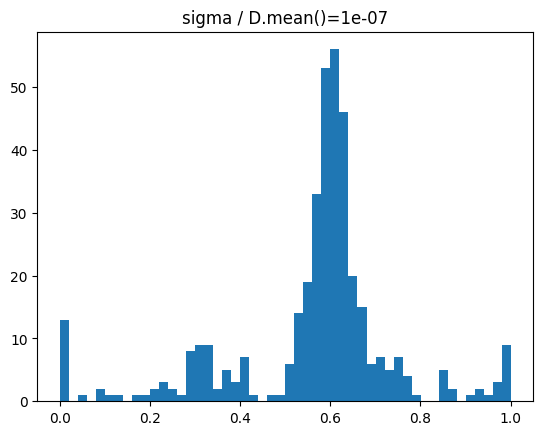

        6888ms INFO  [laplacian_score.py] Comupting weight matrix for a ds of shape (750, 720): n_neighbors=5, sigma=0.16396076634928594
        6917ms INFO  [laplacian_score.py] Computing the Laplacian Score of 389 features belonging to 750 time series


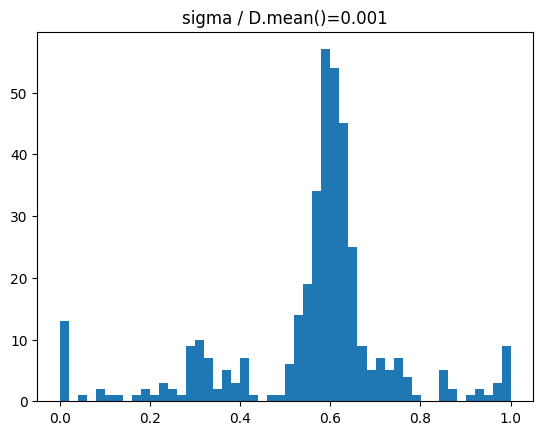

        7561ms INFO  [laplacian_score.py] Comupting weight matrix for a ds of shape (750, 720): n_neighbors=5, sigma=1.6396076634928594
        7579ms INFO  [laplacian_score.py] Computing the Laplacian Score of 389 features belonging to 750 time series


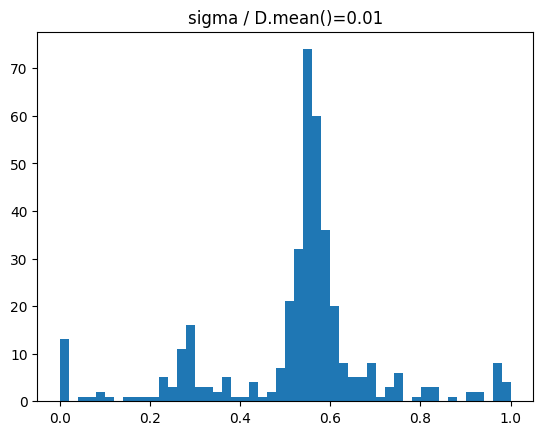

        8375ms INFO  [laplacian_score.py] Comupting weight matrix for a ds of shape (750, 720): n_neighbors=5, sigma=16.396076634928594
        8388ms INFO  [laplacian_score.py] Computing the Laplacian Score of 389 features belonging to 750 time series


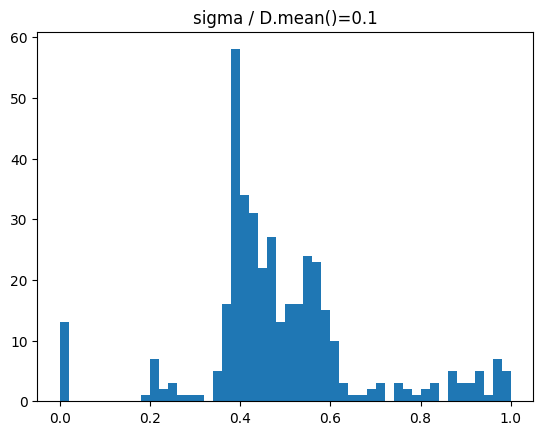

        9041ms INFO  [laplacian_score.py] Comupting weight matrix for a ds of shape (750, 720): n_neighbors=5, sigma=163.96076634928593
        9054ms INFO  [laplacian_score.py] Computing the Laplacian Score of 389 features belonging to 750 time series


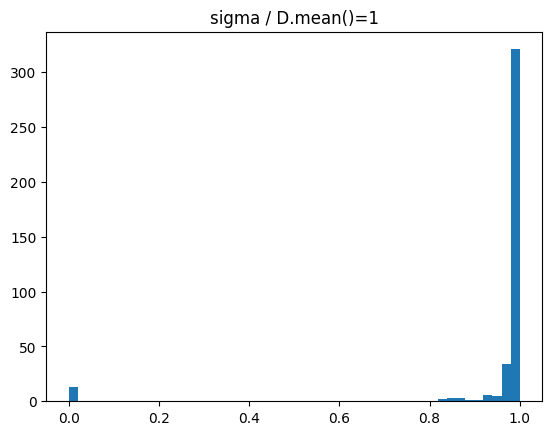

       10009ms INFO  [laplacian_score.py] Comupting weight matrix for a ds of shape (750, 720): n_neighbors=5, sigma=1639.6076634928593
       10033ms INFO  [laplacian_score.py] Computing the Laplacian Score of 389 features belonging to 750 time series


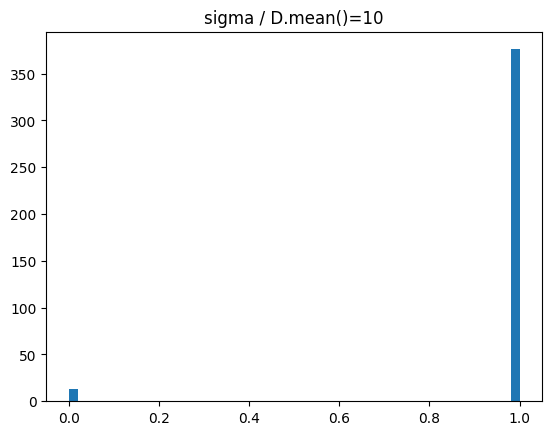

In [5]:
res = {}
Dmean = D.mean()
for sigma_rel in [1e-7, 1e-3, 1e-2, 0.1, 1, 10]:
    S = ls.compute_weight_matrix(ds, n_neighbors=5, sigma=sigma_rel * Dmean, precomputed_distances=D)
    lscores = ls.laplacian_score(f, S)
    res[sigma_rel] = lscores
    plt.hist(lscores, bins=50)
    plt.title(f'sigma / D.mean()={sigma_rel}')
    plt.show()

In [6]:
sigma_rel = 0.1
n_features = 50

lscores = res[sigma_rel]
idx = np.argsort(lscores)[:n_features]
f = ds.features[idx]

In [7]:
f.shape

(50, 750)

In [8]:
np.array(ds.data['target'], dtype=int)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [9]:
labels = np.array(ds.data['target'], dtype=int)
get_svc_accuracy(f.T, labels)

SVC shapes
(750, 50)
(750,)
(375, 50)
(375,)
(375,)
(375,)


(0.7173333333333334, 0.7173333333333334)